### Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Load data

In [3]:
data = pd.read_csv('Customers.csv')

print(f"Amount of data: {data.shape[0]}")

Amount of data: 380


### Check if there are not any null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        380 non-null    int64
 1   Salary     380 non-null    int64
 2   Purchased  380 non-null    int64
dtypes: int64(3)
memory usage: 9.0 KB


In [5]:
X = data[['Age', 'Salary']]
y = data['Purchased']

### Visualize data

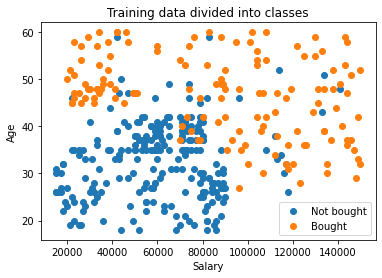

In [13]:
labels_names = {0: "Not bought", 1: "Bought"}
for label in np.unique(y):
    plt.scatter(X['Salary'][y==label], X['Age'][y==label], label=labels_names[label])
plt.legend()
plt.title("Training data divided into classes")
plt.xlabel("Salary")
plt.ylabel("Age")
plt.show()

### Logistic Regression

In [7]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.6342105263157894

### Decision Tree

In [8]:
clf_dt = DecisionTreeClassifier().fit(X,y)
clf_dt.score(X, y)

0.9947368421052631

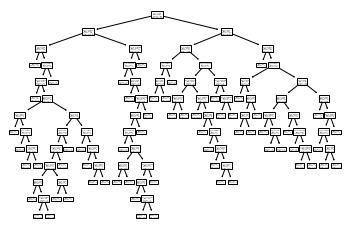

In [9]:
tree.plot_tree(clf_dt)
plt.show()

In [14]:
def get_user_input():
  while True:
    try:
      age = int(input("Give customer age: "))
      salary = int(input("Provide customer salary: "))
      return age, salary
    except ValueError:
      print("Provide a number representing user age and salary!")

def predict_if_user_buy(model):
  age, salary = get_user_input()
  x = pd.DataFrame({'Age': [age], 'Salary': [salary]})

  return "User will buy a watch" if model.predict(x)[0] else "User will not buy a watch"

In [17]:
predict_if_user_buy(clf_dt)

'User will buy a watch'